In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Set plot style
sns.set(style="whitegrid")

In [2]:
# Load the dataset from the provided Excel file
file_path = './loblaws.xlsx'

# Load 'E Comm' for dataset
data = pd.read_excel(file_path, sheet_name='E Comm')

# Display the first few rows of the dataset
data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [3]:
#Load 'Data Dict' for dataset information
data_dict = pd.read_excel(file_path, sheet_name='Data Dict')

# Display the first few rows of the data dictionary
data_dict.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,Data,Variable,Discerption
1,NaN,E Comm,CustomerID,Unique customer ID
2,NaN,E Comm,Churn,Churn Flag
3,NaN,E Comm,Tenure,Tenure of customer in organization
4,NaN,E Comm,PreferredLoginDevice,Preferred login device of customer


In [4]:
data.shape

(5630, 20)

In [5]:
# Checking for missing values
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

Tenure                         264
WarehouseToHome                251
HourSpendOnApp                 255
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
dtype: int64

In [6]:
# Impute missing values in numerical columns with the median
data['Tenure'] = data['Tenure'].fillna(data['Tenure'].median())
data['WarehouseToHome'] = data['WarehouseToHome'].fillna(data['WarehouseToHome'].median())
data['HourSpendOnApp'] = data['HourSpendOnApp'].fillna(data['HourSpendOnApp'].median())
data['OrderAmountHikeFromlastYear'] = data['OrderAmountHikeFromlastYear'].fillna(data['OrderAmountHikeFromlastYear'].median())
data['CouponUsed'] = data['CouponUsed'].fillna(data['CouponUsed'].median())
data['OrderCount'] = data['OrderCount'].fillna(data['OrderCount'].median())
data['DaySinceLastOrder'] = data['DaySinceLastOrder'].fillna(data['DaySinceLastOrder'].median())

# Verify that there are no missing values left
data.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [7]:
# Convert categorical variables to numerical using one-hot encoding
categorical_columns = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']

# Perform one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Display the first few rows of the encoded dataset
data_encoded.head()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,50001,1,4.0,3,6.0,3.0,3,2,9,1,...,False,False,False,False,True,False,False,False,False,True
1,50002,1,9.0,1,8.0,3.0,4,3,7,1,...,False,True,True,False,False,True,False,False,False,True
2,50003,1,9.0,1,30.0,2.0,4,3,6,1,...,False,False,True,False,False,True,False,False,False,True
3,50004,1,0.0,3,15.0,2.0,4,5,8,0,...,False,False,True,False,True,False,False,False,False,True
4,50005,1,0.0,1,12.0,3.0,3,5,3,0,...,False,False,True,False,False,True,False,False,False,True


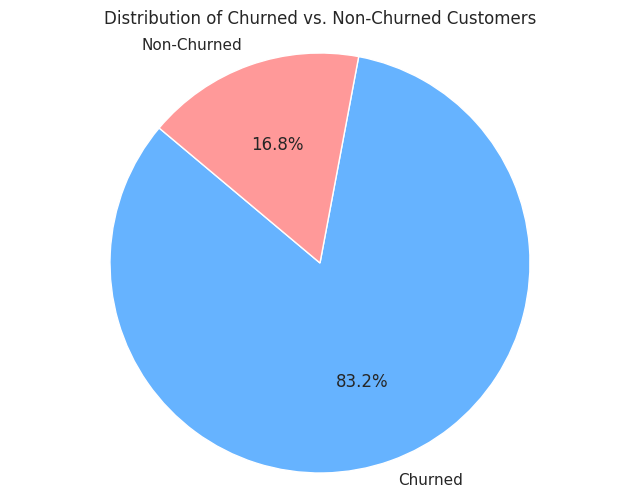

In [8]:
# Pie chart for churned vs. non-churned customers
churn_counts = data_encoded['Churn'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(churn_counts, labels=['Churned', 'Non-Churned'], autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Distribution of Churned vs. Non-Churned Customers')
plt.axis('equal')
plt.show()

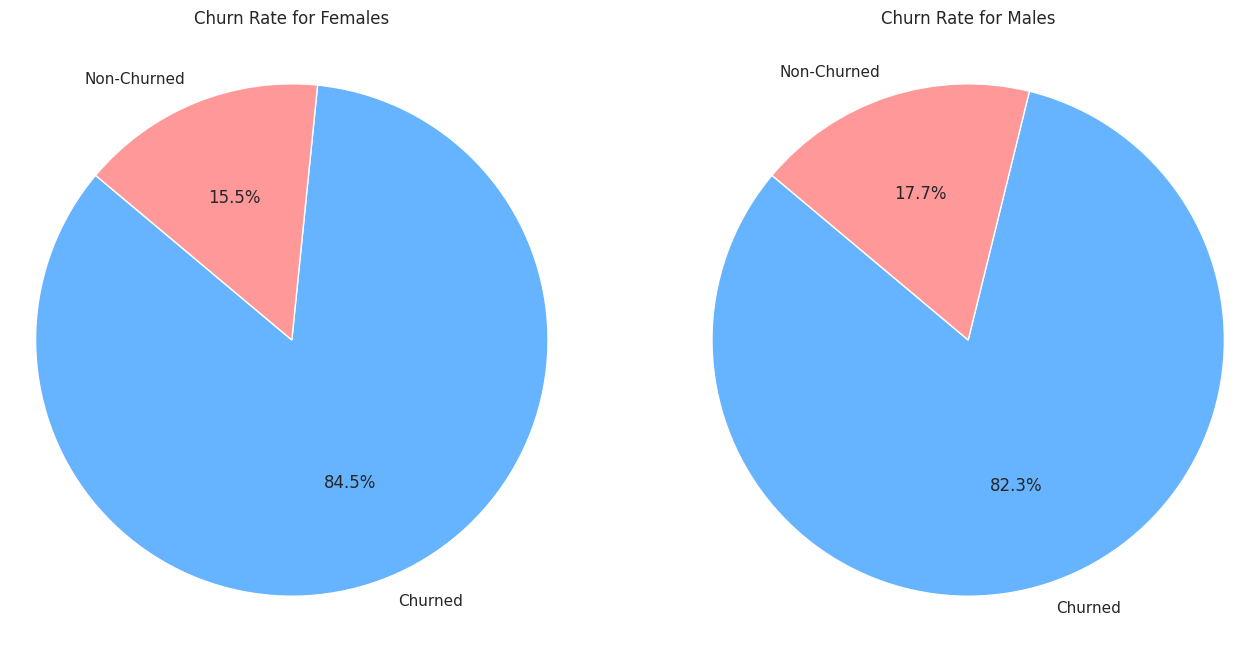

In [9]:
# Pie chart for churn rate by gender
gender_churn_counts = data_encoded.groupby('Gender_Male')['Churn'].value_counts().unstack()
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.pie(gender_churn_counts.iloc[0], labels=['Churned', 'Non-Churned'], autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Churn Rate for Females')
plt.axis('equal')

plt.subplot(1, 2, 2)
plt.pie(gender_churn_counts.iloc[1], labels=['Churned', 'Non-Churned'], autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Churn Rate for Males')
plt.axis('equal')

plt.show()

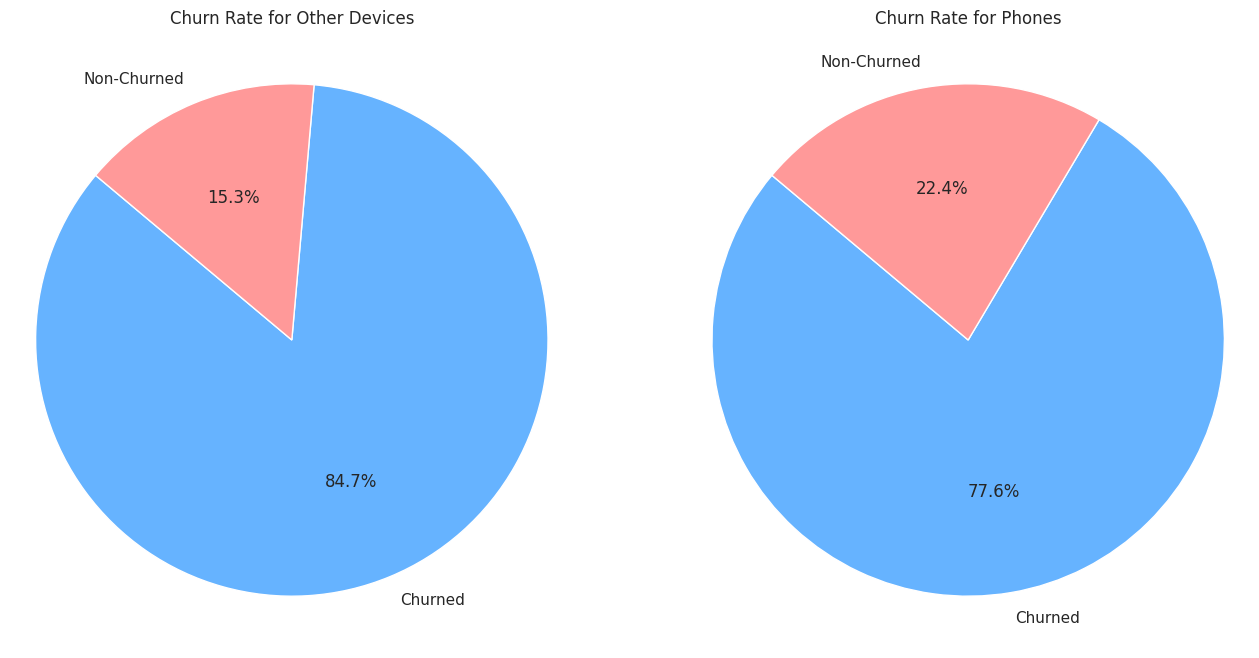

In [10]:
# Pie chart for churn rate by preferred login device
device_churn_counts = data_encoded.groupby('PreferredLoginDevice_Phone')['Churn'].value_counts().unstack()
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.pie(device_churn_counts.iloc[0], labels=['Churned', 'Non-Churned'], autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Churn Rate for Other Devices')
plt.axis('equal')

plt.subplot(1, 2, 2)
plt.pie(device_churn_counts.iloc[1], labels=['Churned', 'Non-Churned'], autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Churn Rate for Phones')
plt.axis('equal')

plt.show()

In [11]:
# Bar plot for churn rate by city tier
#plt.figure(figsize=(10, 6))
#sns.countplot(x='CityTier', hue='Churn', data=data_encoded, palette='coolwarm')
#plt.title('Churn Rate by City Tier')
#plt.xlabel('City Tier')
#plt.ylabel('Count')
#plt.show()

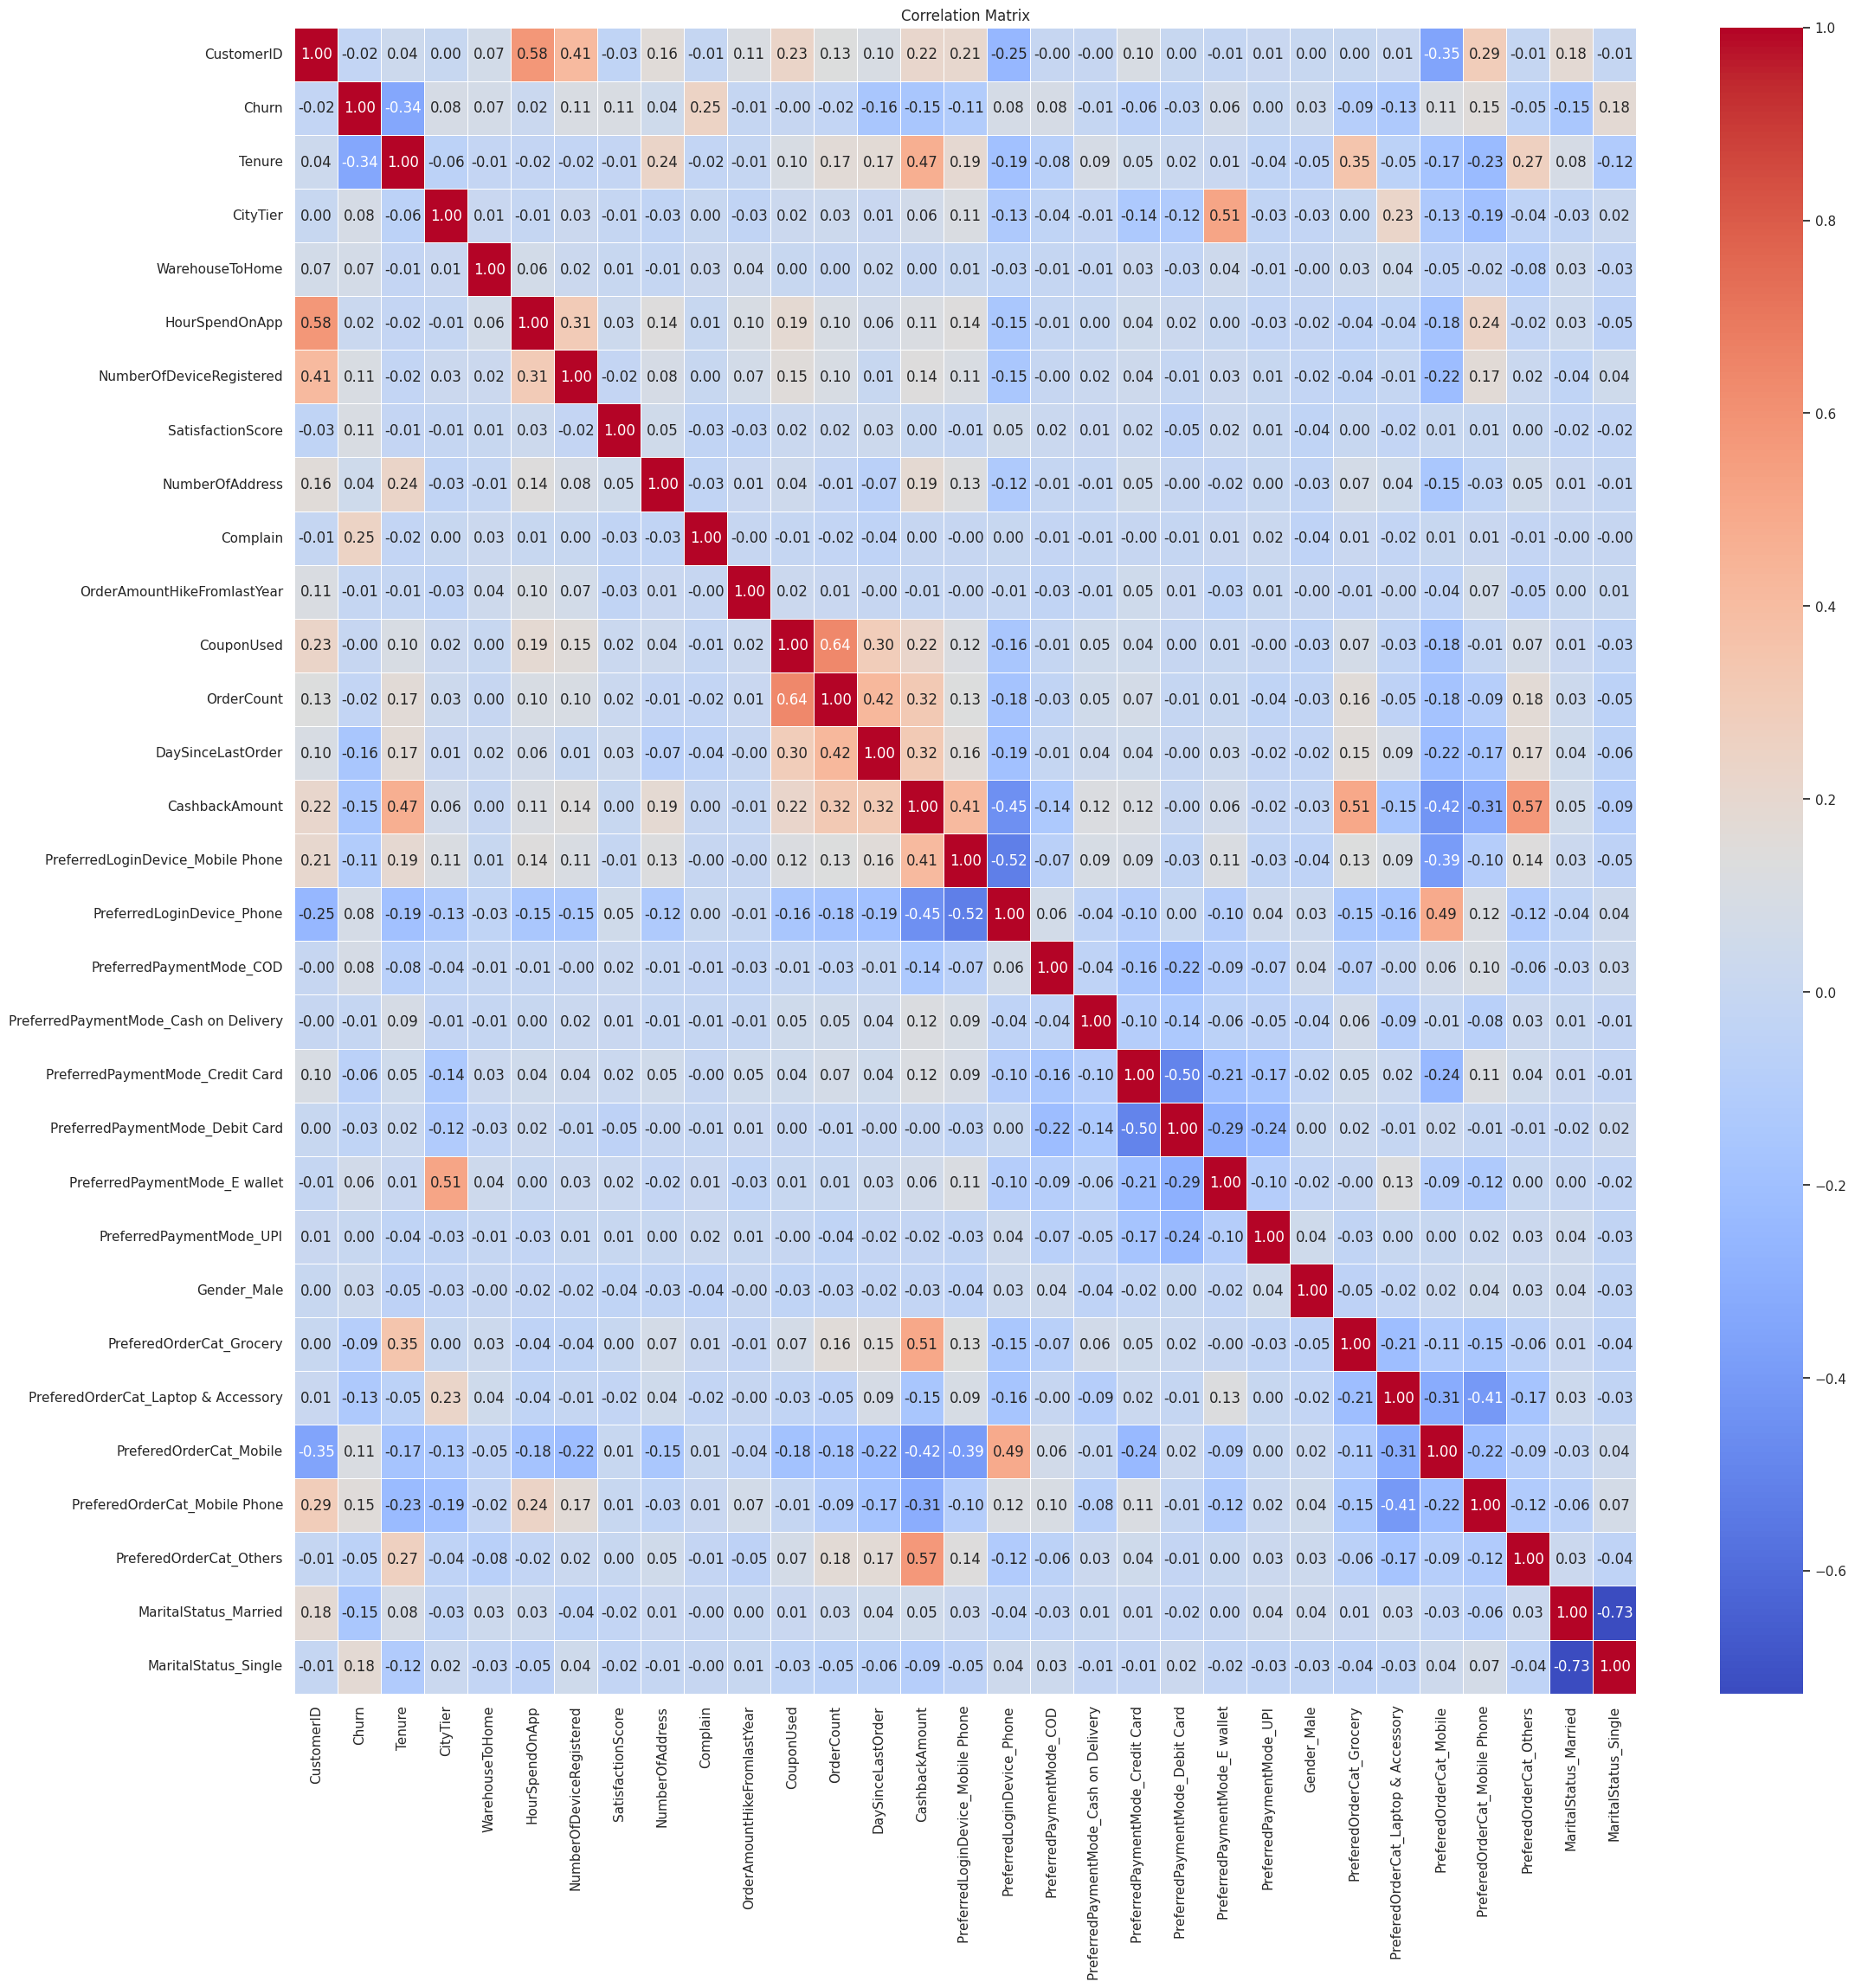

In [12]:
# Plot the correlation heatmap
correlation_matrix = data_encoded.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [13]:
# Create new features
data_encoded['EngagementScore'] = data_encoded['HourSpendOnApp'] * data_encoded['OrderCount']

# Select features for scaling
features_to_scale = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
                     'SatisfactionScore', 'NumberOfAddress', 'OrderAmountHikeFromlastYear',
                     'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount', 'EngagementScore']

# Initialize the scaler
scaler = StandardScaler()

# Scale the selected features
data_encoded[features_to_scale] = scaler.fit_transform(data_encoded[features_to_scale])

# Define features (X) and target (y)
X = data_encoded.drop(['CustomerID', 'Churn'], axis=1)
y = data_encoded['Churn']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Initialize the models
log_reg = LogisticRegression(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
gb_clf = GradientBoostingClassifier(random_state=42)

# Train and evaluate Logistic Regression
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Train and evaluate Random Forest
rf_clf.fit(X_train, y_train)
y_pred_rf_clf = rf_clf.predict(X_test)

# Train and evaluate Gradient Boosting
gb_clf.fit(X_train, y_train)
y_pred_gb_clf = gb_clf.predict(X_test)

# Function to print evaluation metrics
def print_metrics(y_test, y_pred, model_name):
    print(f"Evaluation Metrics for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.2f}")
    print(f"AUC-ROC: {roc_auc_score(y_test, y_pred):.2f}")
    print("")

# Print metrics for each model
print_metrics(y_test, y_pred_log_reg, "Logistic Regression")
print_metrics(y_test, y_pred_rf_clf, "Random Forest")
print_metrics(y_test, y_pred_gb_clf, "Gradient Boosting")

Evaluation Metrics for Logistic Regression:
Accuracy: 0.91
Precision: 0.87
Recall: 0.56
F1-Score: 0.68
AUC-ROC: 0.77

Evaluation Metrics for Random Forest:
Accuracy: 0.98
Precision: 0.99
Recall: 0.88
F1-Score: 0.93
AUC-ROC: 0.94

Evaluation Metrics for Gradient Boosting:
Accuracy: 0.92
Precision: 0.84
Recall: 0.66
F1-Score: 0.74
AUC-ROC: 0.82



In [15]:
# Get feature importances from the trained Random Forest model
feature_importances = rf_clf.feature_importances_

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importances_df)

                                  Feature  Importance
0                                  Tenure    0.209959
12                         CashbackAmount    0.097055
2                         WarehouseToHome    0.069142
6                         NumberOfAddress    0.061053
11                      DaySinceLastOrder    0.060319
7                                Complain    0.058232
8             OrderAmountHikeFromlastYear    0.056037
5                       SatisfactionScore    0.046277
29                        EngagementScore    0.035616
4                NumberOfDeviceRegistered    0.034708
10                             OrderCount    0.026874
28                   MaritalStatus_Single    0.025608
9                              CouponUsed    0.025102
1                                CityTier    0.023015
21                            Gender_Male    0.016274
25          PreferedOrderCat_Mobile Phone    0.015668
23    PreferedOrderCat_Laptop & Accessory    0.014957
3                          H

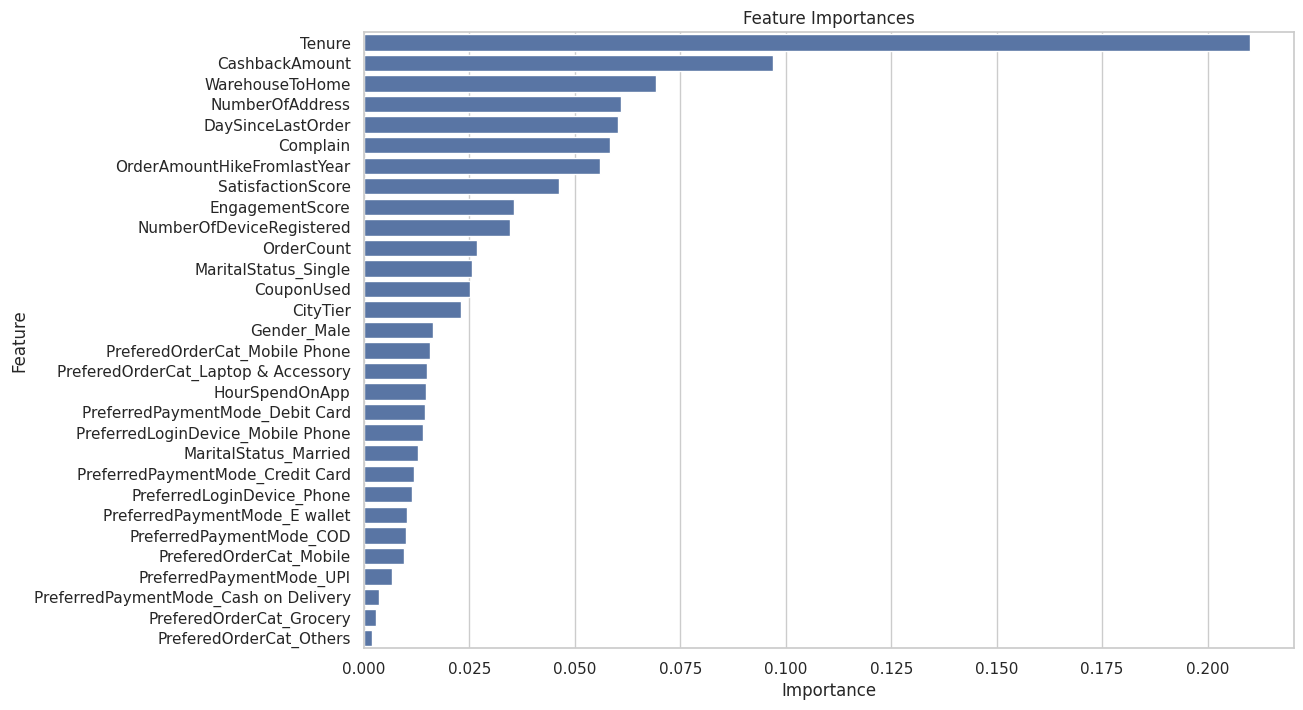

In [16]:
# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importances')
plt.show()

In [17]:
# Evaluate the Random Forest model on the test set
y_pred_rf_final = rf_clf.predict(X_test)

# Calculate evaluation metrics
final_accuracy = accuracy_score(y_test, y_pred_rf_final)
final_precision = precision_score(y_test, y_pred_rf_final)
final_recall = recall_score(y_test, y_pred_rf_final)
final_f1_score = f1_score(y_test, y_pred_rf_final)
final_auc_roc = roc_auc_score(y_test, y_pred_rf_final)

# Display the final evaluation metrics
final_metrics = {
    'Accuracy': final_accuracy,
    'Precision': final_precision,
    'Recall': final_recall,
    'F1-Score': final_f1_score,
    'AUC-ROC': final_auc_roc
}

print("Final Model Evaluation Metrics:")
for metric, value in final_metrics.items():
    print(f"{metric}: {value:.2f}")

Final Model Evaluation Metrics:
Accuracy: 0.98
Precision: 0.99
Recall: 0.88
F1-Score: 0.93
AUC-ROC: 0.94
